In [8]:
# Copyright (C) 2022 Intel Corporationworkbench.action.openLargeOutput
#
# SPDX-License-Identifier: MIT

import os
import datumaro as dm
import time

from datumaro.components.searcher import Searcher
from datumaro.components.visualizer import Visualizer

In [2]:
start_time = time.time()
# dataset = dm.Dataset.import_from('./tests/assets/coco_dataset/coco', save_hash=True)
dataset = dm.Dataset.import_from("coco_dataset", format='coco_instances', save_hash=True)
print(f'setting dataset time for {len(dataset)} items: ', time.time()-start_time)

0it [00:00, ?it/s]/home/dwekr/workspace/datumaro_sa/datumaro/components/model_inference.py:479: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  if "value" in node.attributeNames() and str(node["value"]).startswith("cuda"):
/home/dwekr/workspace/datumaro_sa/datumaro/components/model_inference.py:506: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  if inputs[i].node()["value"] == 5:
5000it [2:23:28,  1.72s/it]


setting dataset time for 5000 items:  8609.53713274002


In [3]:
print("Subset candidates: ", dataset.subsets().keys())
subset = list(dataset.subsets().keys())
print("Subset: ", subset)

Subset candidates:  dict_keys(['val2017'])
Subset:  ['val2017']


In [4]:
def get_ids(dataset: dm.Dataset):
    ids = []
    for item in dataset:
            ids += [item.id]
    return ids

In [9]:
ids = get_ids(dataset)

In [12]:
for i, item in enumerate(dataset):
    if i==2:
        query = item
print(query)

DatasetItem(id='000000252219', subset='val2017', media=<datumaro.components.media.Image object at 0x7f653fd12f90>, annotations=[Polygon(id=481918, attributes={'is_crowd': False}, group=481918, points=[361.81, 368.51, 337.11, 369.76, 342.14, 359.72, 340.46, 358.04, 348.0, 350.51, 345.9, 332.09, 341.3, 322.04, 338.37, 314.5, 338.37, 293.57, 336.27, 281.01, 339.21, 261.75, 339.21, 249.61, 333.46, 245.82, 331.8, 241.68, 326.28, 240.57, 327.66, 230.08, 330.14, 216.54, 331.25, 209.91, 338.27, 204.44, 341.82, 202.44, 346.91, 199.51, 346.14, 195.5, 343.2, 193.8, 340.89, 192.72, 340.58, 188.55, 341.51, 185.77, 344.44, 184.69, 344.75, 183.15, 344.75, 180.68, 349.22, 175.49, 353.54, 174.56, 358.48, 175.03, 362.34, 177.03, 364.34, 179.65, 364.96, 183.36, 366.97, 185.36, 369.74, 185.98, 371.9, 187.21, 367.58, 189.99, 367.74, 193.54, 365.89, 194.78, 366.19, 196.63, 368.66, 198.17, 372.21, 198.48, 377.3, 199.25, 380.24, 200.18, 381.78, 202.49, 385.02, 205.78, 387.64, 212.57, 390.11, 218.74, 392.43, 2

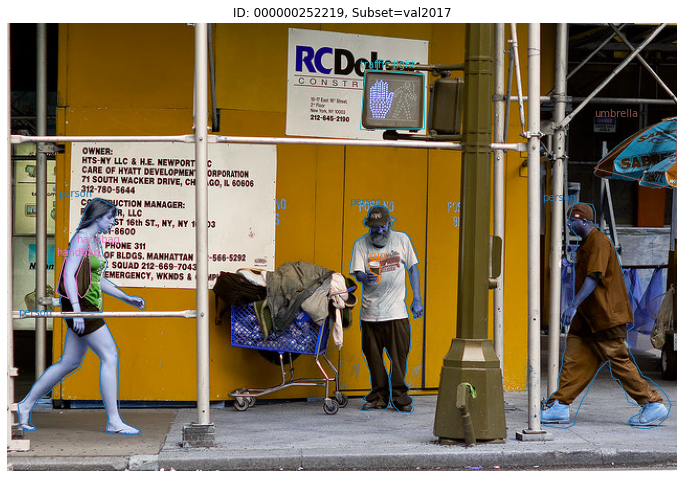

In [13]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "val2017")
fig.show()

In [14]:
searcher = Searcher(dataset)

In [17]:
topk_list = searcher.search_topk(query, topk=100)
topk_list

['000000256195',
 '000000274066',
 '000000405249',
 '000000197528',
 '000000088265',
 '000000269866',
 '000000097924',
 '000000360960',
 '000000057725',
 '000000275749',
 '000000431140',
 '000000575357',
 '000000442463',
 '000000300842',
 '000000296657',
 '000000565607',
 '000000419974',
 '000000573626',
 '000000190676',
 '000000323895',
 '000000155154',
 '000000054628',
 '000000370900',
 '000000373315',
 '000000024021',
 '000000300276',
 '000000405279',
 '000000016598',
 '000000281693',
 '000000008690',
 '000000507975',
 '000000440475',
 '000000509719',
 '000000569273',
 '000000012670',
 '000000032887',
 '000000189436',
 '000000121506',
 '000000334977',
 '000000253386',
 '000000008629',
 '000000150726',
 '000000368752',
 '000000181666',
 '000000521601',
 '000000567640',
 '000000185472',
 '000000499266',
 '000000218091',
 '000000116439',
 '000000180011',
 '000000093261',
 '000000184338',
 '000000234757',
 '000000234526',
 '000000257865',
 '000000530061',
 '000000378139',
 '000000198915

In [18]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
results = [query.id] + topk_list

In [19]:
results

['000000252219',
 '000000256195',
 '000000274066',
 '000000405249',
 '000000197528',
 '000000088265',
 '000000269866',
 '000000097924',
 '000000360960',
 '000000057725',
 '000000275749',
 '000000431140',
 '000000575357',
 '000000442463',
 '000000300842',
 '000000296657',
 '000000565607',
 '000000419974',
 '000000573626',
 '000000190676',
 '000000323895',
 '000000155154',
 '000000054628',
 '000000370900',
 '000000373315',
 '000000024021',
 '000000300276',
 '000000405279',
 '000000016598',
 '000000281693',
 '000000008690',
 '000000507975',
 '000000440475',
 '000000509719',
 '000000569273',
 '000000012670',
 '000000032887',
 '000000189436',
 '000000121506',
 '000000334977',
 '000000253386',
 '000000008629',
 '000000150726',
 '000000368752',
 '000000181666',
 '000000521601',
 '000000567640',
 '000000185472',
 '000000499266',
 '000000218091',
 '000000116439',
 '000000180011',
 '000000093261',
 '000000184338',
 '000000234757',
 '000000234526',
 '000000257865',
 '000000530061',
 '000000378139

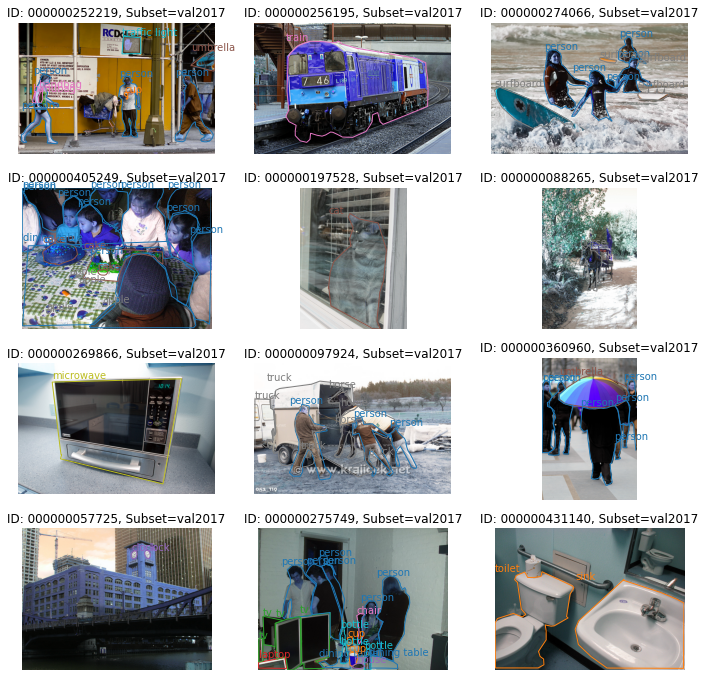

In [20]:
fig = visualizer.vis_gallery(results[:12], "val2017", (None, None))
fig.show()